## Подключение библиотек

In [446]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

## Изучение данных

In [447]:
heart_data = pd.read_csv('data.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [448]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [449]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:>

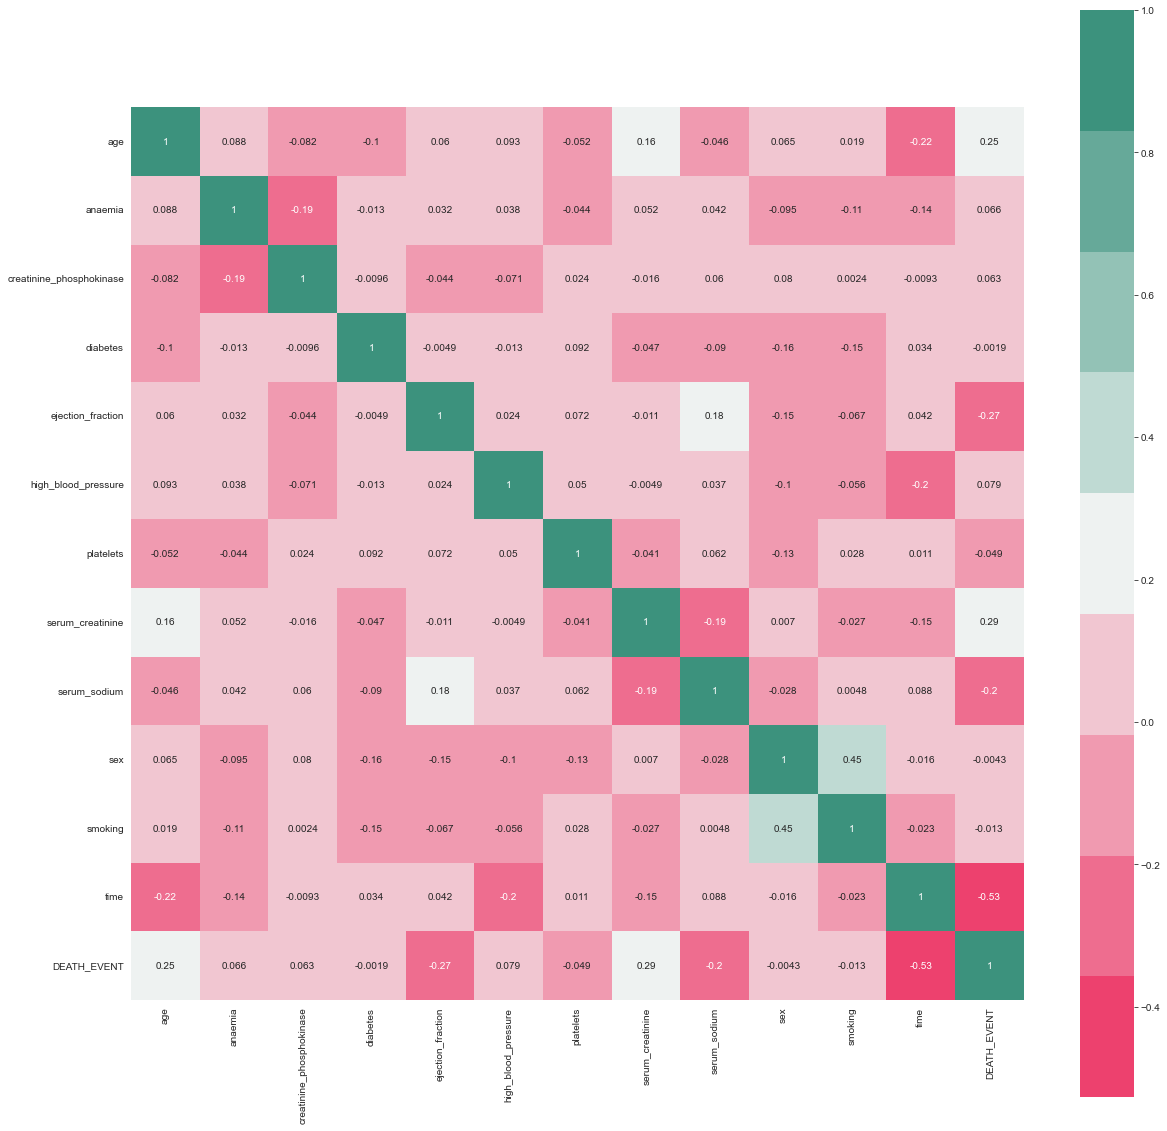

In [450]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = heart_data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True)

1. Фактор "time" (период наблюдения) является самым важным и имеет обратную зависимость от других факторов, поскольку очень важно как можно раньше диагностировать заболевание, чтобы получить своевременное лечение, тем самым снижая вероятность смертельного исхода.
2. Фактор "serum_creatinine" (уровень креатинина в сыворотке крови) не менее важен (корреляция со смертельным исходом 0.29), так как нормальное содержание креатинина облегчает работу сердца.
3. Фактор "ejecton_fraction" (фракции выброса) также оказывает значительное влияние на целевую переменную, потому что с фракциями выброса связана эффективность работы сердца.
4. Также можно заметить, что с возрастом работа сердца ухудшается

#### Проверка факторов на потенциальные выбросы

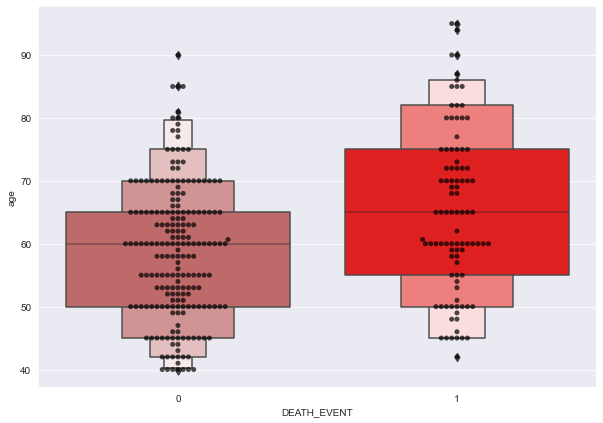

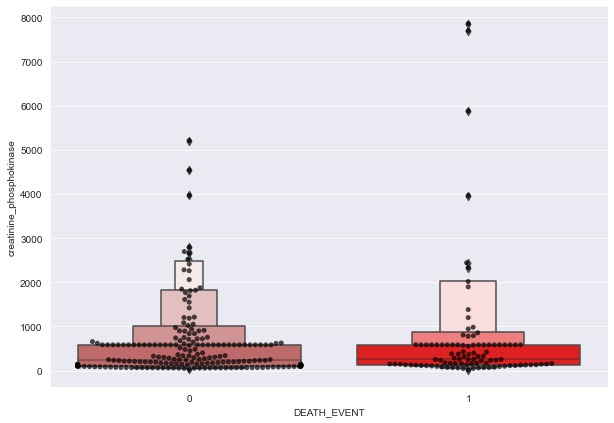

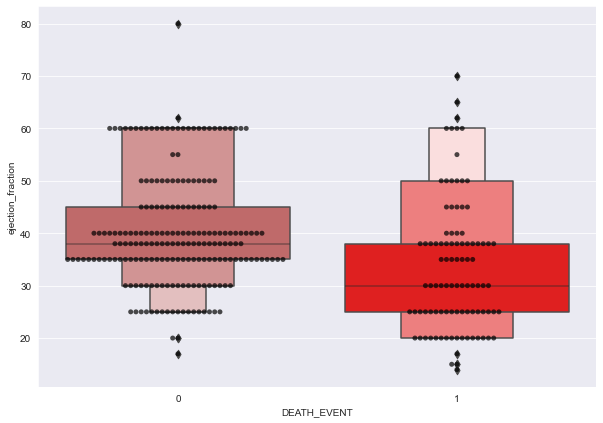

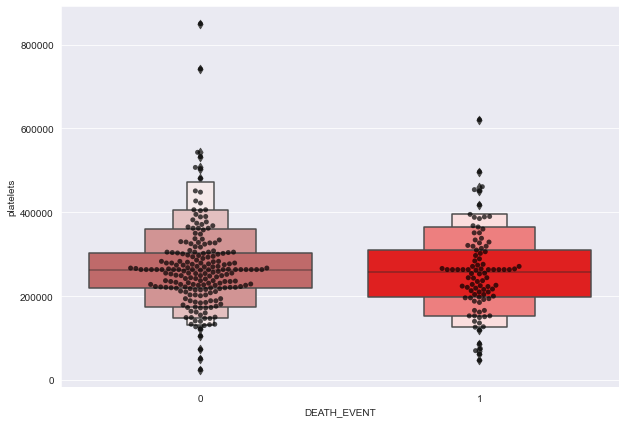

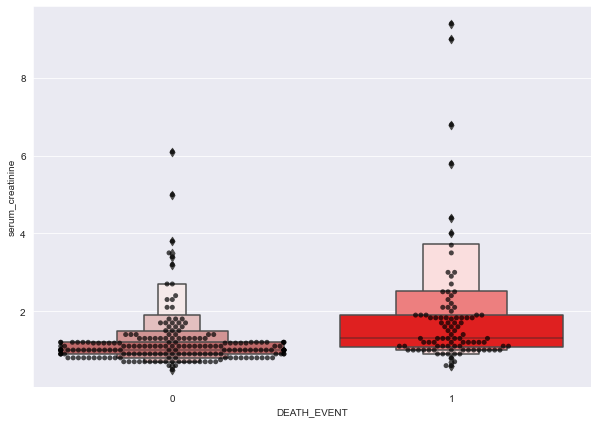

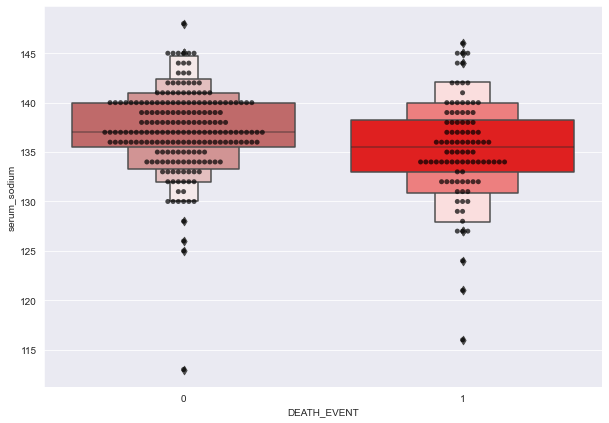

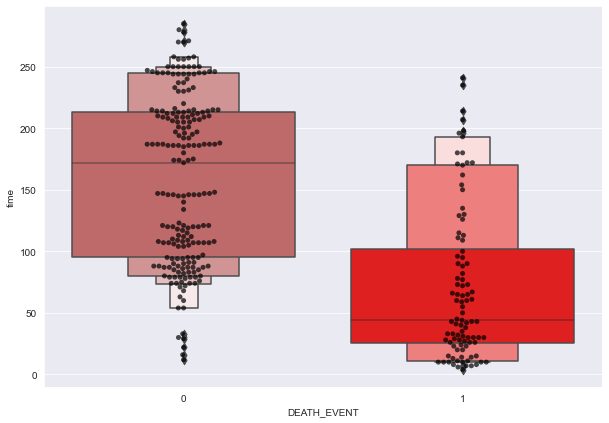

In [451]:
feature = ["age", "creatinine_phosphokinase", "ejection_fraction", 
           "platelets", "serum_creatinine", "serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=heart_data["DEATH_EVENT"], y=heart_data[i], color='black', alpha=0.7)
    sns.boxenplot(x=heart_data["DEATH_EVENT"], y=heart_data[i], palette=["#CD5C5C","#FF0000"])
    plt.show()

1. Практически все факторы имеют выбросы.
2. Учитывая размер набора данных и его релевантность, не следует исключать такие выбросы при предварительной обработке данных, чтобы не совершить какую-либо статистическую ошибку.

In [452]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_data['age'],
    xbins = dict(
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТУ',
    xaxis_title_text='ВОЗРАСТ', 
    yaxis_title_text='КОЛИЧЕСТВО',
    bargap=0.05,
    xaxis = {'showgrid' : False},
    yaxis = {'showgrid' : False},
    template = 'plotly_dark'
)

fig.show()

Разброс данных достаточно высокий


In [453]:
fig = px.histogram(heart_data, x="age", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns, 
                   title ="Влияние ВОЗРАСТА на ВЫЖИВАЕМОСТЬ", 
                   labels={"age": "ВОЗРАСТ"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

Для визуализации данных использовались столбчатая и скрипичная диаграммы.
Принцип работы скрипичных графиков: более широкие участки графика скрипки представляют более высокую вероятность заданного значения, более тонкие - меньшую вероятность.

In [454]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_data['creatinine_phosphokinase'],
    xbins=dict(
        start=23,
        end=582,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='РАСПРЕЛЕНИЕ ПО УРОВНЮ КРЕАТИНФОСФОКИНАЗЫ В КРОВИ',
    xaxis_title_text='УРОВЕНЬ КРЕАТИНФОСФОКИНАЗЫ (мкг/л)',
    yaxis_title_text='КОЛИЧЕСТВО',
    bargap=0.05,
    xaxis = {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [455]:
fig = px.histogram(heart_data, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns,
                   title ="Влияние УРОВНЯ КРЕАТИНФОСФОКИНАЗЫ на ВЫЖИВАЕМОСТЬ", 
                   labels={"creatinine_phosphokinase": "УРОВЕНЬ КРЕАТИНФОСФОКИНАЗЫ (мкг/л)"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [456]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_data['ejection_fraction'],
    xbins=dict(
        start=14,
        end=70,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='РАСПРЕДЕЛЕНИЕ ПО ФРАКЦИИ ВЫБРОСА',
    xaxis_title_text='ФРАКЦИЯ ВЫБРОСА (%)',
    yaxis_title_text='КОЛИЧЕСТВО',
    bargap=0.05,
    xaxis = {'showgrid': False},
    yaxis = {'showgrid': False},
    template = 'plotly_dark'
)

fig.show()

In [457]:
fig = px.histogram(heart_data, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns,
                   title ="Влияние ФРАКЦИИ ВЫБРОСА на ВЫЖИВАЕМОСТЬ", 
                   labels={"ejection_fraction": "ФРАКЦИЯ ВЫБРОСА (%)"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [458]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_data['platelets'],
    xbins=dict(
        start=25000,
        end=300000,
        size=5000
    ),
    marker_color='#50BFE6',
    opacity=1
))

fig.update_layout(
    title_text='РАСПРЕДЕЛЕНИЕ ПО КОЛИЧЕСТВУ ТРОМБОЦИТОВ',
    xaxis_title_text='КОЛИЧЕСТВО ТРОМБОЦИТОВ (на 1 мл крови)',
    yaxis_title_text='КОЛИЧЕСТВО',
    bargap=0.05,
    xaxis = {'showgrid': False},
    yaxis = {'showgrid': False},
    template = 'plotly_dark'
)

fig.show()

In [459]:
fig = px.histogram(heart_data, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns,
                   title ="Влияние КОЛИЧЕСТВА ТРОМБОЦИТОВ на ВЫЖИВАЕМОСТЬ", 
                   labels={"platelets": "КОЛИЧЕСТВО ТРОМБОЦИТОВ (на 1 мл крови)"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [460]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_data['serum_creatinine'],
    xbins=dict(
        start=0.5,
        end=9.4,
        size=0.2
    ),
    marker_color='#E77200',
    opacity=1
))

fig.update_layout(
    title_text='РАСПРЕДЕЛЕНИЕ ПО УРОВНЮ КРЕАТИНИНА',
    xaxis_title_text='КРЕАТИНИН (мг/дл)',
    yaxis_title_text='КОЛИЧЕСТВО', 
    bargap=0.05,
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [461]:
fig = px.histogram(heart_data, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns,
                   title ="Влияние УРОВНЯ КРЕАТИНИНА на ВЫЖИВАЕМОСТЬ", 
                   labels={"serum_creatinine": "КРЕАТИНИН (мг/дл)"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [462]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_data['serum_sodium'],
    xbins=dict(
        start=113,
        end=148,
        size=1
    ),
    marker_color='#AAF0D1',
    opacity=1
))

fig.update_layout(
    title_text='РАСПРЕДЕЛЕНИЕ ПО УРОВНЮ НАТРИЯ',
    xaxis_title_text='НАТРИЙ (мэкв/л)',
    yaxis_title_text='КОЛИЧЕСТВО', 
    bargap=0.05,
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [463]:
fig = px.histogram(heart_data, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=heart_data.columns,
                   title ="Влияние УРОВНЯ НАТРИЯ на ВЫЖИВАЕМОСТЬ", 
                   labels={"serum_sodium": "НАТРИЙ (мэкв/л)"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [464]:
d1 = heart_data[(heart_data["DEATH_EVENT"]==0) & (heart_data["sex"]==1)]
d2 = heart_data[(heart_data["DEATH_EVENT"]==1) & (heart_data["sex"]==1)]
d3 = heart_data[(heart_data["DEATH_EVENT"]==0) & (heart_data["sex"]==0)]
d4 = heart_data[(heart_data["DEATH_EVENT"]==1) & (heart_data["sex"]==0)]

label1 = ["Мужчина", "Женщина"]
label2 = ["Мужчина - Выжил", "Мужчина - Умер", "Женщина - Выжила", "Женщина - Умерла"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1), len(d2), len(d3), len(d4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ПОЛ"), 1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ПОЛ - ВЫЖИВАЕМОСТЬ"), 1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="РАСПРЕДЕЛЕНИЕ ПО ПОЛУ В НАБОРЕ ДАННЫХ \
                    ПОЛ - ВЫЖИВАЕМОСТЬ",
    annotations=[dict(text='ПОЛ', x=0.21, y=0.5, font_size=10, showarrow=False),
                dict(text='ПОЛ - ВЫЖИВАЕМОСТЬ', x=0.837, y=0.5, font_size=9, showarrow=False)],
    autosize=False, width=1200, height=500, paper_bgcolor="white")

fig.show()

#### ВЫВОД: Из приведённых выше диаграмм можно сделать вывод что, в наборе данных 64,9% мужчин (из которых 44,1% выжило и 20,7% умерло) и 35,1% женщин (из которых 23,7% выжило и 11,4% умерло).

In [465]:
d1 = heart_data[(heart_data["DEATH_EVENT"]==0) & (heart_data["diabetes"]==0)]
d2 = heart_data[(heart_data["DEATH_EVENT"]==0) & (heart_data["diabetes"]==1)]
d3 = heart_data[(heart_data["DEATH_EVENT"]==1) & (heart_data["diabetes"]==0)]
d4 = heart_data[(heart_data["DEATH_EVENT"]==1) & (heart_data["diabetes"]==1)]

label1 = ["НЕТ диабета","ЕСТЬ диабет"]
label2 = ["НЕТ диабета - Выжил(-а)", "ЕСТЬ диабет - Выжил(-а)", "НЕТ диабета - Умер(-ла)", "ЕСТЬ диабет - Умер(-ла)"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ДИАБЕТ"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ДИАБЕТ - ВЫЖИВАЕМОСТЬ"),
              1, 2)
              
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="РАСПРЕДЕЛЕНИЕ ПО НАЛИЧИЮ ДИАБЕТА \
                  ДИАБЕТ - ВЫЖИВАЕМОСТЬ",
    annotations=[dict(text='ДИАБЕТ', x=0.196, y=0.5, font_size=12, showarrow=False),
                 dict(text='ДИАБЕТ - ВЫЖИВАЕМОСТЬ', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

#### ВЫВОД: В наборе данных 58,2% пациентов не страдают диабетом (из которых 39,5% выжило и 18,7% умерло) и 41,8% пациентов больны диабетом (из которых 28,4% выжило и 13,4% умерло).

In [466]:
d1 = heart_data[(heart_data["DEATH_EVENT"]==0) & (heart_data["anaemia"]==0)]
d2 = heart_data[(heart_data["DEATH_EVENT"]==1) & (heart_data["anaemia"]==0)]
d3 = heart_data[(heart_data["DEATH_EVENT"]==0) & (heart_data["anaemia"]==1)]
d4 = heart_data[(heart_data["DEATH_EVENT"]==1) & (heart_data["anaemia"]==1)]

label1 = ["НЕТ анемии","ЕСТЬ анемия"]
label2 = ['НЕТ анемии - Выжил(-а)','НЕТ анемии - Умер(-ла)', "ЕСТЬ анемия - Выжил(-а)", "ЕСТЬ анемия - Умер(-ла)"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="АНЕМИЯ"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="АНЕМИЯ - ВЫЖИВАЕМОСТЬ"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="РАСПРЕДЕЛЕНИЕ ПО НАЛИЧИИ АНЕМИИ \
                  АНЕМИЯ - ВЫЖИВАЕМОСТЬ",
    annotations=[dict(text='АНЕМИЯ', x=0.194, y=0.5, font_size=12, showarrow=False),
                 dict(text='АНЕМИЯ - ВЫЖИВАЕМОСТЬ', x=0.842, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

#### ВЫВОД: В наборе данных 56,9% пациентов не больны анемией (из них 40,1% выжило и 16,7% умерло) и 43,1% пациентов страдают от анемии (из них 27,8% выжило и 15,4% умерло).

In [467]:
d1 = heart_data[(heart_data["DEATH_EVENT"]==0) & (heart_data["high_blood_pressure"]==0)]
d2 = heart_data[(heart_data["DEATH_EVENT"]==1) & (heart_data["high_blood_pressure"]==0)]
d3 = heart_data[(heart_data["DEATH_EVENT"]==0) & (heart_data["high_blood_pressure"]==1)]
d4 = heart_data[(heart_data["DEATH_EVENT"]==1) & (heart_data["high_blood_pressure"]==1)]\

label1 = ["НЕТ гипертонии","ЕСТЬ гипертония"]
label2 = ['НЕТ гипертонии - Выжил(-а)', 'НЕТ гипертонии - Умер(-ла)', "ЕСТЬ гипертония - Выжил(-а)", "ЕСТЬ гипертония - Умер(-ла)"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ГИПЕРТОНИЯ"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ГИПЕРТОНИЯ - ВЫЖИВАЕМОСТЬ"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="РАСПРЕДЕЛЕНИЕ ПО НАЛИЧИЮ ГИПЕРТОНИИ \
                  ГИПЕРТОНИЯ - ВЫЖИВАЕМОСТЬ",
    annotations=[dict(text='ГИПЕРТОНИЯ', x=0.177, y=0.5, font_size=12, showarrow=False),
                 dict(text='ГИПЕРТОНИЯ - ВЫЖИВАЕМОСТЬ', x=0.845, y=0.5, font_size=7, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

#### ВЫВОД: В наборе данных у 64,9% пациентов нет гипертонии (из которых 45,8% выжило и 19,1% умерло) и у 35,1% - есть гипертония (из которых 22,1% выжило и 13% умерло).

In [468]:
d1 = heart_data[(heart_data["DEATH_EVENT"]==0) & (heart_data["smoking"]==0)]
d2 = heart_data[(heart_data["DEATH_EVENT"]==1) & (heart_data["smoking"]==0)]
d3 = heart_data[(heart_data["DEATH_EVENT"]==0) & (heart_data["smoking"]==1)]
d4 = heart_data[(heart_data["DEATH_EVENT"]==1) & (heart_data["smoking"]==1)]

label1 = ["НЕ курит","Курит"]
label2 = ['НЕ курит - Выжил(-а)','НЕ курит - Умер(-ла)', "Курит - Выжил(-а)", "Курит - Умер(-ла)"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="КУРЕНИЕ"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="КУРЕНИЕ - ВЫЖИВАЕМОСТЬ"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="РАСПРЕДЕЛЕНИЕ ПО КУРЕНИЮ \
                  КУРЕНИЕ - ВЫЖИВАЕМОСТЬ",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='КУРЕНИЕ', x=0.195, y=0.5, font_size=12, showarrow=False),
                 dict(text='КУРЕНИЕ - ВЫЖИВАЕМОСТЬ', x=0.842, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

#### ВЫВОД: В наборе входных данных 67,9% некурящих пациентов (из которых 45,8% выжило и 22,1% умерло) и 32,1% - курящих (из которых 22,1% выжило и 10% умерло).

In [469]:
fig = px.histogram(heart_data, x="age", color="diabetes", marginal="violin",hover_data=heart_data.columns,
                   title ="РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТУ И НАЛИЧИЮ ДИАБЕТА", 
                   labels={"diabetes": "ДИАБЕТ", "age": "ВОЗРАСТ"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [470]:
fig = px.histogram(heart_data, x="age", color="anaemia", marginal="violin",hover_data=heart_data.columns,
                   title ="РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТУ И НАЛИЧИЮ АНЕМИИ", 
                   labels={"anaemia": "АНЕМИЯ", "age": "ВОЗРАСТ"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [471]:
fig = px.histogram(heart_data, x="age", color="high_blood_pressure", marginal="violin",hover_data=heart_data.columns,
                   title ="РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТУ И НАЛИЧИЮ ГИПЕРТОНИИ", 
                   labels={"high_blood_pressure": "ГИПЕРТОНИЯ", "age": "ВОЗРАСТ"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [472]:
fig = px.histogram(heart_data, x="age", color="smoking", marginal="violin",hover_data=heart_data.columns,
                   title ="РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТУ И КУРЕНИЮ", 
                   labels={"smoking": "КУРЕНИЕ", "age": "ВОЗРАСТ"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

## Моделирование данных и обучение

In [473]:
# Деление датасета на обучающую и тестовую выборки
x = heart_data.iloc[:, [4,7,11]].values
y = heart_data.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [474]:
print(x_train)

[[ 50.     1.    44.  ]
 [ 60.     1.1  146.  ]
 [ 60.     0.8   22.  ]
 [ 25.     1.2   85.  ]
 [ 38.     1.8  213.  ]
 [ 60.     1.5   95.  ]
 [ 35.     1.18 119.  ]
 [ 40.     0.7  175.  ]
 [ 60.     1.4  205.  ]
 [ 60.     1.   186.  ]
 [ 38.     2.2   45.  ]
 [ 20.     2.7    8.  ]
 [ 60.     0.9  117.  ]
 [ 40.     1.2  214.  ]
 [ 35.     0.9  126.  ]
 [ 25.     1.7  111.  ]
 [ 35.     0.8  187.  ]
 [ 35.     1.   206.  ]
 [ 30.     1.83  23.  ]
 [ 30.     0.7  246.  ]
 [ 45.     1.3   88.  ]
 [ 40.     0.7  187.  ]
 [ 25.     1.3   16.  ]
 [ 38.     5.8   26.  ]
 [ 40.     0.8  250.  ]
 [ 25.     1.7  120.  ]
 [ 35.     0.9   71.  ]
 [ 38.     1.1  246.  ]
 [ 35.     0.7  197.  ]
 [ 30.     0.7  104.  ]
 [ 80.     1.18  63.  ]
 [ 30.     1.    12.  ]
 [ 40.     1.2   91.  ]
 [ 25.     1.    15.  ]
 [ 50.     0.7   79.  ]
 [ 38.     1.4  280.  ]
 [ 60.     0.7  106.  ]
 [ 38.     1.9   23.  ]
 [ 35.     0.9  240.  ]
 [ 35.     1.8  186.  ]
 [ 45.     0.9  174.  ]
 [ 50.     0.9  

In [475]:
print(y_test)

[0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0]


In [476]:
# Масштабирование объектов

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [477]:
accuracy_list = []

### 1. Логистическая регрессия (Logistic Regression) 

In [478]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [479]:
print(Fore.GREEN + "Точность логистической регрессии:", "{:.2f}%".format(100* log_reg_acc))

Точность логистической регрессии: 90.00%


### 2. Support Vector (SVC)

In [480]:
sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100*sv_clf_acc)

In [481]:
print(Fore.GREEN + "Точность SVC:", "{:.2f}%".format(100* sv_clf_acc))

Точность SVC: 91.67%


### 3. Метод k-ближайших соседей (K Neighbors Classifier)

In [482]:
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [483]:
print(Fore.GREEN + "Точность метода k-ближайших соседей:", "{:.2f}%".format(100* kn_acc))

Точность метода k-ближайших соседей: 88.33%


### 4. Дерево решений (Decision Tree Classifier)

In [484]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [485]:
print(Fore.GREEN + "Точность дерева решений:", "{:.2f}%".format(100* dt_acc))

Точность дерева решений: 90.00%


### 5. Случайный лес (Random Forest Classifier)

In [486]:
r_clf = RandomForestClassifier(n_estimators=50, max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [487]:
print(Fore.GREEN + "Точность случайного леса:", "{:.2f}%".format(100* r_acc))

Точность случайного леса: 90.00%


### 6. Градиентный бустинг (Gradient Boosting Classifier)

In [488]:
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)

In [489]:
print(Fore.GREEN + "Точность градиентного бустинга:", "{:.2f}%".format(100* gradientboost_acc))

Точность градиентного бустинга: 93.33%


### 7. XGBoost Classifier

In [490]:
xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
xgb_clf.fit(x_train,y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

In [491]:
print(Fore.GREEN + "Точность XGBoost Classifier:", "{:.2f}%".format(100* xgb_acc))

Точность XGBoost Classifier: 93.33%


### 8. Усиленный световой градиент (LightGBM Classifier)

In [492]:
lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
lgb_clf.fit(x_train,y_train)
lgb_pred = lgb_clf.predict(x_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
accuracy_list.append(100*lgb_acc)

[LightGBM] [Info] Number of positive: 79, number of negative: 160
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330544 -> initscore=-0.705726
[LightGBM] [Info] Start training from score -0.705726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [493]:
print(Fore.GREEN + "Точность LightGBM Classifier:","{:.2f}%".format(100* lgb_acc))

Точность LightGBM Classifier: 86.67%


### 9. CatBoost Classifier

In [494]:
cat_clf = CatBoostClassifier()
cat_clf.fit(x_train,y_train)
cat_pred = cat_clf.predict(x_test)
cat_acc = accuracy_score(y_test, cat_pred)
accuracy_list.append(100*cat_acc)

Learning rate set to 0.005591
0:	learn: 0.6887201	total: 1.7ms	remaining: 1.69s
1:	learn: 0.6840529	total: 3.28ms	remaining: 1.64s
2:	learn: 0.6795505	total: 4.84ms	remaining: 1.61s
3:	learn: 0.6749511	total: 6.28ms	remaining: 1.56s
4:	learn: 0.6705838	total: 7.62ms	remaining: 1.52s
5:	learn: 0.6666455	total: 9.12ms	remaining: 1.51s
6:	learn: 0.6625749	total: 10.4ms	remaining: 1.48s
7:	learn: 0.6584226	total: 15.7ms	remaining: 1.94s
8:	learn: 0.6544390	total: 17.2ms	remaining: 1.9s
9:	learn: 0.6505446	total: 18.5ms	remaining: 1.83s
10:	learn: 0.6469374	total: 20ms	remaining: 1.8s
11:	learn: 0.6424854	total: 21.3ms	remaining: 1.76s
12:	learn: 0.6400120	total: 22.2ms	remaining: 1.69s
13:	learn: 0.6361491	total: 23.5ms	remaining: 1.65s
14:	learn: 0.6322711	total: 24.7ms	remaining: 1.62s
15:	learn: 0.6289088	total: 25.9ms	remaining: 1.59s
16:	learn: 0.6248179	total: 27.1ms	remaining: 1.57s
17:	learn: 0.6208045	total: 28.4ms	remaining: 1.55s
18:	learn: 0.6169106	total: 29.6ms	remaining: 1.5

In [495]:
print(Fore.GREEN + "Точность CatBoost Classifier:","{:.2f}%".format(100* cat_acc))

Точность CatBoost Classifier: 93.33%


## Заключение

In [496]:
model_list = ['Logistic Regression', 'SVC', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest',
             'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost']

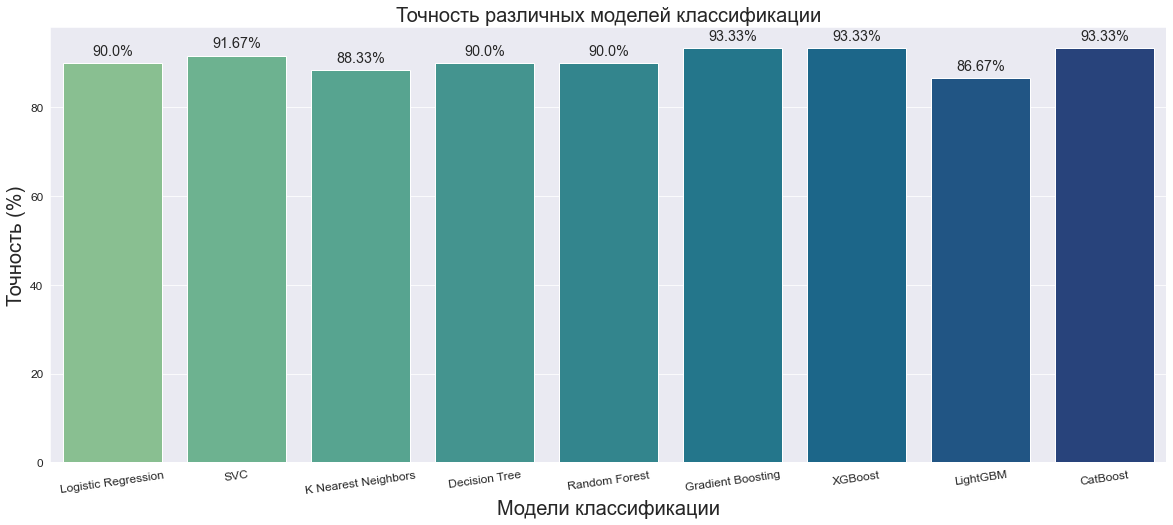

In [497]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "crest", saturation =2.0)
plt.xlabel('Модели классификации', fontsize = 20 )
plt.ylabel('Точность (%)', fontsize = 20)
plt.title('Точность различных моделей классификации', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

    • Логистическая регрессия (Logistic Regression): 90.00%
    • Support Vector (SVC): 91.67%
    • Метод k-ближайших соседей (K-Nearest Neigbors): 88.33%
    • Дерево решений (Decision Tree): 90.00%
    • Случайный лес (Random Forest): 90.00%
    • Градиентный бустинг (Gradient Boosting): 93.33%
    • XGBoost: 93.33%
    • Усиленный световой градиент (LightGBM Classifier: 86.67%
    • CatBoost: 93.33%